In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import math
import gc
!pip install openpyxl

In [ ]:
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2, VGG16, VGG19, ResNet152V2
from keras.models import Sequential
from keras.callbacks import Callback,ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
!pip install Adam

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

 99% 2.04G/2.06G [00:22<00:00, 46.3MB/s]
100% 2.06G/2.06G [00:22<00:00, 97.5MB/s]


In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 99% 737M/745M [00:05<00:00, 155MB/s]
100% 745M/745M [00:05<00:00, 142MB/s]


In [ ]:
!unzip /content/chest-xray-covid19-pneumonia.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  infl

In [ ]:
!unzip /content/covid19-radiography-database.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-672.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6720.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6721.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Nor

In [ ]:
!unzip /content/chest-xray-covid19-pneumonia.zip


Archive:  /content/chest-xray-covid19-pneumonia.zip
replace Data/test/COVID19/COVID19(460).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_cov=pd.read_excel("../content/COVID-19_Radiography_Dataset/COVID.metadata.xlsx")
train_cov["label"]= "COVID"
train_nor=pd.read_excel("../content/COVID-19_Radiography_Dataset/Normal.metadata.xlsx").sample(4192)
train_nor["label"]= "NORMAL"
train_pneu=pd.read_excel("../content/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx")
train_pneu["label"]= "PNEUMONIA"

In [ ]:
import os
import pandas as pd
y = 0
data = []
for dirname, _, filenames in os.walk('../content/Data/train/PNEUMONIA'):
    for filename in filenames:
        y = y + 1
        if y<=2847:
            data.append(os.path.join(dirname, filename))


In [ ]:
df_pneu2 = pd.DataFrame(data)

In [ ]:
df_pneu2.rename(columns = {0:'images'}, inplace = True)
df_pneu2["target"] = "PNEUMONIA"

In [ ]:
df_pneu2

,images,target
0,../content/Data/train/PNEUMONIA/PNEUMONIA(142)...,PNEUMONIA
1,../content/Data/train/PNEUMONIA/PNEUMONIA(996)...,PNEUMONIA
2,../content/Data/train/PNEUMONIA/PNEUMONIA(966)...,PNEUMONIA
3,../content/Data/train/PNEUMONIA/PNEUMONIA(34).jpg,PNEUMONIA
4,../content/Data/train/PNEUMONIA/PNEUMONIA(646)...,PNEUMONIA
...,...,...
2842,../content/Data/train/PNEUMONIA/PNEUMONIA(468)...,PNEUMONIA
2843,../content/Data/train/PNEUMONIA/PNEUMONIA(2199...,PNEUMONIA
2844,../content/Data/train/PNEUMONIA/PNEUMONIA(1318...,PNEUMONIA
2845,../content/Data/train/PNEUMONIA/PNEUMONIA(1651...,PNEUMONIA


In [ ]:
import os
import pandas as pd
data1 = []
x = 0
for dirname, _, filenames in os.walk('../content/Data/train/COVID19'):
    for filename in filenames:
            data1.append(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('../content/Data/test/COVID19'):
    for filename in filenames:
            data1.append(os.path.join(dirname, filename))

In [ ]:
df_cov2 = pd.DataFrame(data1)
df_cov2.rename(columns = {0:'images'}, inplace = True)
df_cov2["target"] = "COVID"

In [ ]:
df_cov2.shape

(576, 2)

In [ ]:
train_dir='../content/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/'
data=[]
labels=[]
for i in range(train_cov.shape[0]):
    data.append(train_dir+train_cov['FILE NAME'].iloc[i]+'.png')
    labels.append(train_cov['label'].iloc[i])
df_cov=pd.DataFrame(data)
df_cov.columns=['images']
df_cov['target']=labels

In [ ]:
x= []
for i in range(train_nor.shape[0]):
    x.append(train_nor["FILE NAME"].iloc[i].title())

In [ ]:
train_dir='../content/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/'
data=[]
labels=[]
for i in range(train_nor.shape[0]):
    data.append(train_dir+x[i]+'.png')
    labels.append(train_nor['label'].iloc[i])
df_nor=pd.DataFrame(data)
df_nor.columns=['images']
df_nor['target']=labels

In [ ]:
df_nor

,images,target
0,../content/covid19-radiography-database/COVID-...,NORMAL
1,../content/covid19-radiography-database/COVID-...,NORMAL
2,../content/covid19-radiography-database/COVID-...,NORMAL
3,../content/covid19-radiography-database/COVID-...,NORMAL
4,../content/covid19-radiography-database/COVID-...,NORMAL
...,...,...
4187,../content/covid19-radiography-database/COVID-...,NORMAL
4188,../content/covid19-radiography-database/COVID-...,NORMAL
4189,../content/covid19-radiography-database/COVID-...,NORMAL
4190,../content/covid19-radiography-database/COVID-...,NORMAL


In [ ]:
train_dir='../content/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/'
data=[]
labels=[]
for i in range(train_pneu.shape[0]):
    data.append(train_dir+train_pneu['FILE NAME'].iloc[i]+'.png')
    labels.append(train_pneu['label'].iloc[i])
df_pneu=pd.DataFrame(data)
df_pneu.columns=['images']
df_pneu['target']=labels

In [ ]:
train=pd.concat([df_pneu,df_nor,df_cov,df_pneu2,df_cov2])
train=train.reset_index()

In [ ]:
train["target"].value_counts()

NORMAL       4192
COVID        4192
PNEUMONIA    4192
Name: target, dtype: int64

In [ ]:
train= train.drop(["index"], axis=1)

In [ ]:
train

,images,target
0,../content/covid19-radiography-database/COVID-...,PNEUMONIA
1,../content/covid19-radiography-database/COVID-...,PNEUMONIA
2,../content/covid19-radiography-database/COVID-...,PNEUMONIA
3,../content/covid19-radiography-database/COVID-...,PNEUMONIA
4,../content/covid19-radiography-database/COVID-...,PNEUMONIA
...,...,...
12571,../content/Data/test/COVID19/COVID19(508).jpg,COVID
12572,../content/Data/test/COVID19/COVID19(539).jpg,COVID
12573,../content/Data/test/COVID19/COVID19(529).jpg,COVID
12574,../content/Data/test/COVID19/COVID19(468).jpg,COVID


In [ ]:
train.shape

(12576, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train['images'],train['target'],test_size=0.2,random_state=42)

train_gen = pd.DataFrame({'image_dir': x_train, 'target': y_train})
val_gen = pd.DataFrame({'image_dir': x_val, 'target': y_val})

In [ ]:
val_gen["target"].value_counts()

COVID        857
NORMAL       841
PNEUMONIA    818
Name: target, dtype: int64

In [ ]:
train_gen

,image_dir,target
10772,../content/Data/train/PNEUMONIA/PNEUMONIA(2340...,PNEUMONIA
11833,../content/Data/train/PNEUMONIA/PNEUMONIA(221)...,PNEUMONIA
10513,../content/Data/train/PNEUMONIA/PNEUMONIA(3008...,PNEUMONIA
7808,../content/covid19-radiography-database/COVID-...,COVID
7523,../content/covid19-radiography-database/COVID-...,COVID
...,...,...
11964,../content/Data/train/PNEUMONIA/PNEUMONIA(1362...,PNEUMONIA
5191,../content/covid19-radiography-database/COVID-...,NORMAL
5390,../content/covid19-radiography-database/COVID-...,NORMAL
860,../content/covid19-radiography-database/COVID-...,PNEUMONIA


In [ ]:
val_gen

,image_dir,target
7316,../content/covid19-radiography-database/COVID-...,COVID
2119,../content/covid19-radiography-database/COVID-...,NORMAL
4629,../content/covid19-radiography-database/COVID-...,NORMAL
357,../content/covid19-radiography-database/COVID-...,PNEUMONIA
5894,../content/covid19-radiography-database/COVID-...,COVID
...,...,...
10091,../content/Data/train/PNEUMONIA/PNEUMONIA(3136...,PNEUMONIA
2611,../content/covid19-radiography-database/COVID-...,NORMAL
9952,../content/Data/train/PNEUMONIA/PNEUMONIA(1711...,PNEUMONIA
11064,../content/Data/train/PNEUMONIA/PNEUMONIA(580)...,PNEUMONIA


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_gen,
    x_col='image_dir',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    shuffle=True,
    class_mode='sparse',
validate_filenames=True)

validation_generator = val_datagen.flow_from_dataframe(
    val_gen,
    x_col='image_dir',
    y_col='target',
    target_size=(256, 256),
    shuffle=False,
    batch_size=32,
    class_mode='sparse',
validate_filenames=True)

Found 2762 validated image filenames belonging to 2 classes.
Found 661 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 7298 invalid image filename(s) in x_col="image_dir". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1855 invalid image filename(s) in x_col="image_dir". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.metrics import AUC
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from tensorflow.keras import Model
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
      layers.BatchNormalization(),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.3),
      layers.Conv2D(128,3,activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(256, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.3),
      layers.Conv2D(512, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(1024, activation='relu'),
      layers.Dropout(0.15),
      layers.Dense(3, activation= 'softmax')
    ])

In [ ]:
import tensorflow.keras
#from focal_loss import BinaryFocalLoss
from tensorflow.keras.metrics import AUC
opt = tensorflow.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # model.compile(loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'],optimizer=opt)
# model.compile(loss=BinaryFocalLoss(gamma=2), metrics=['AUC'],optimizer=opt)

In [ ]:
nb_epochs = 3
batch_size=32

In [ ]:
hist=model.fit(
    train_generator,
    epochs=nb_epochs,
    validation_data=validation_generator)

# history = model.fit(train_generator,validation_data = validation_generator,epochs = 100,callbacks=callbacks)

Epoch 1/3
87/87 [==============================] - 1371s 16s/step - loss: 0.9860 - accuracy: 0.8841 - val_loss: 0.6762 - val_accuracy: 0.9395
Epoch 2/3
87/87 [==============================] - 1379s 16s/step - loss: 0.1427 - accuracy: 0.9566 - val_loss: 0.3816 - val_accuracy: 0.9531
Epoch 3/3
87/87 [==============================] - 1387s 16s/step - loss: 0.1299 - accuracy: 0.9594 - val_loss: 0.3447 - val_accuracy: 0.9380


In [ ]:
def plot_accuracy_loss_chart(history):
    epochs = [i for i in range(3)]
    fig , ax = plt.subplots(1,2)
    train_acc = hist.history['accuracy']
    train_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    fig.set_size_inches(20,10)
    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

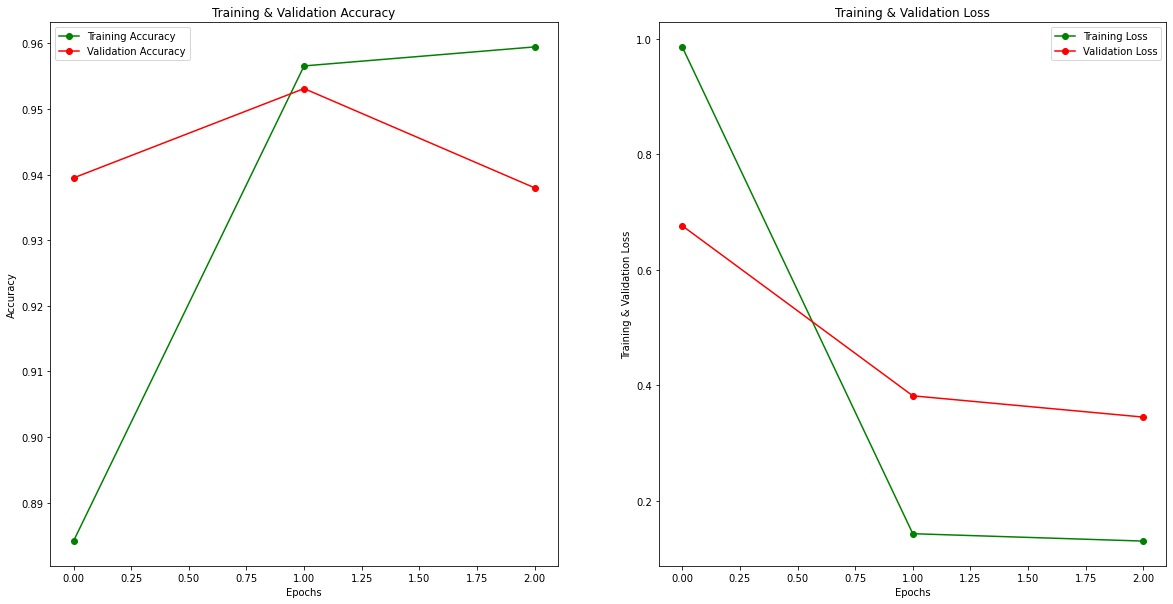

In [ ]:
plot_accuracy_loss_chart(hist)

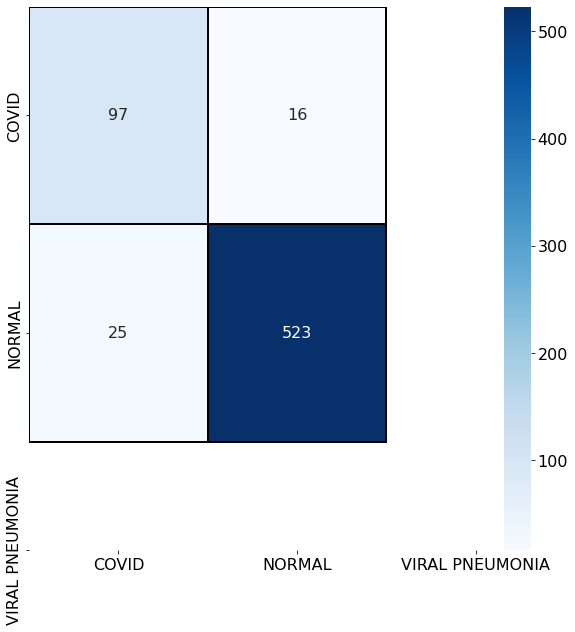

In [ ]:
from sklearn.metrics import confusion_matrix
plt.rcParams.update({'font.size': 16})
predictions = model.predict(validation_generator)
predictions = np.argmax(predictions,axis=1)
predictions[:15]
cm = confusion_matrix(validation_generator.classes, predictions)
cm = pd.DataFrame(cm, index = ['0', '1'], columns = ['0', '1'])
cm
class_names = ['COVID','NORMAL','VIRAL PNEUMONIA']
def plot_confusion_matrix (cm):
    plt.figure(figsize = (10,10))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
plt.rcParams.update({'font.size': 16})
predictions = model.predict(validation_generator)
predictions = np.argmax(predictions,axis=1)
predictions[:15]
cm = confusion_matrix(validation_generator.classes, predictions)
cm = pd.DataFrame(cm, index = ['0', '1', '2'], columns = ['0', '1'])
cm
class_names = ['COVID','NORMAL','VIRAL PNEUMONIA']
def plot_confusion_matrix (cm):
    plt.figure(figsize = (10,10))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)

ValueError: ignored

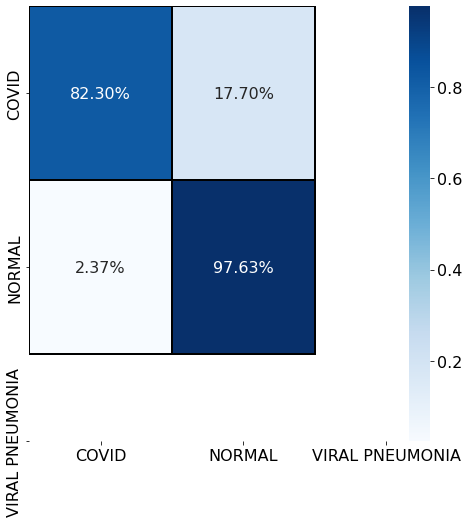

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(validation_generator.classes, predictions, normalize='true')
def plot_confusion_matrix (cm):
    plt.figure(figsize = (8,8))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt=".2%", 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)

In [ ]:
!unzip /content/archive.zip 

Archive:  /content/archive.zip
  inflating: NASNet-large-no-top.h5  
  inflating: densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5  
  inflating: mobilenet_7_5_224_tf_no_top.h5  
  inflating: mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5  
  inflating: resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5  
  inflating: vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5  
  inflating: vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5  
  inflating: xception_weights_tf_dim_ordering_tf_kernels_notop.h5  


MOBILENETV2

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), include_top = False, weights = "imagenet")
for layer in base_model.layers:
  layer.trainable = False
model = tf.keras.Sequential([base_model,tf.keras.layers.GlobalAveragePooling2D(),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(3, activation = "softmax")])
model.summary()


9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
___________________________________________

In [ ]:
opt = tensorflow.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist2=model.fit(
    train_generator,
    epochs=nb_epochs,
    validation_data=validation_generator)

Epoch 1/3
87/87 [==============================] - 232s 3s/step - loss: 0.1978 - accuracy: 0.9243 - val_loss: 0.0929 - val_accuracy: 0.9697
Epoch 2/3
87/87 [==============================] - 211s 2s/step - loss: 0.0687 - accuracy: 0.9768 - val_loss: 0.0662 - val_accuracy: 0.9773
Epoch 3/3
87/87 [==============================] - 216s 2s/step - loss: 0.0577 - accuracy: 0.9804 - val_loss: 0.0635 - val_accuracy: 0.9773


In [ ]:
def plot_accuracy_loss_chart(history):
    epochs = [i for i in range(3)]
    fig , ax = plt.subplots(1,2)
    train_acc = hist.history['accuracy']
    train_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    fig.set_size_inches(20,10)
    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

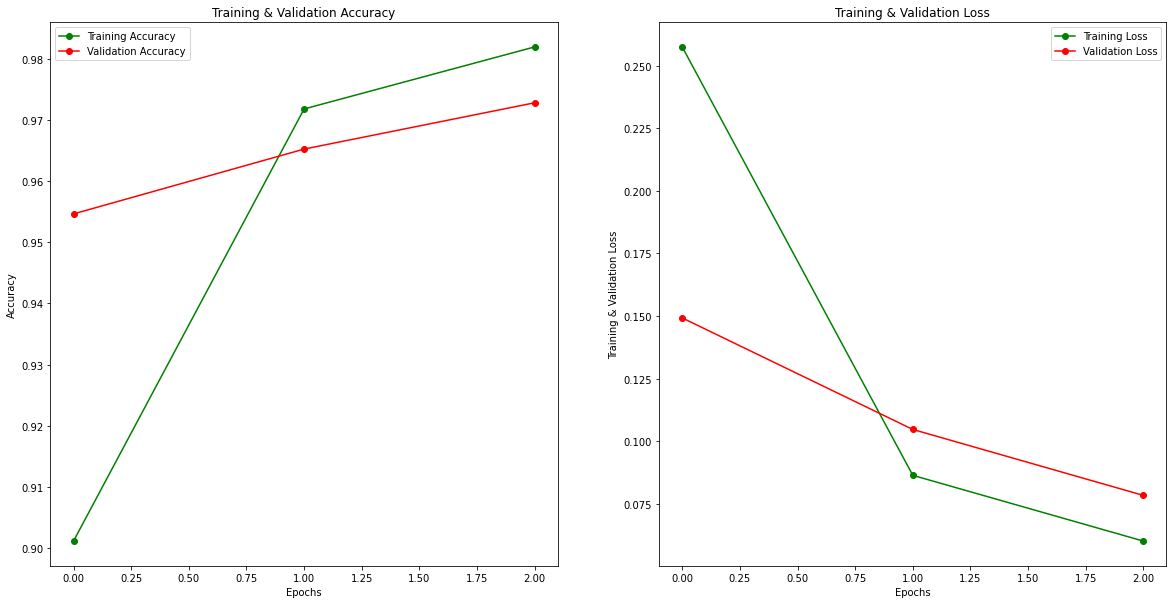

In [ ]:
plot_accuracy_loss_chart(hist2)

VGG16

In [ ]:
base_model2=tf.keras.applications.VGG16(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)
for layer in base_model2.layers:
  layer.trainable = False
model2 = tf.keras.Sequential([base_model,tf.keras.layers.GlobalAveragePooling2D(),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(3, activation = "softmax")])

In [ ]:
opt = tensorflow.keras.optimizers.Adam(learning_rate = 1e-3)
model2.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist3=model2.fit(
    train_generator,
    epochs=nb_epochs,
    validation_data=validation_generator)

Epoch 1/3
87/87 [==============================] - 231s 3s/step - loss: 0.0487 - accuracy: 0.9848 - val_loss: 0.0622 - val_accuracy: 0.9743
Epoch 2/3
87/87 [==============================] - 230s 3s/step - loss: 0.0460 - accuracy: 0.9870 - val_loss: 0.0583 - val_accuracy: 0.9758
Epoch 3/3
87/87 [==============================] - 224s 3s/step - loss: 0.0459 - accuracy: 0.9862 - val_loss: 0.0507 - val_accuracy: 0.9788


In [ ]:
def plot_accuracy_loss_chart(history):
    epochs = [i for i in range(3)]
    fig , ax = plt.subplots(1,2)
    train_acc = hist.history['accuracy']
    train_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    fig.set_size_inches(20,10)
    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

VGG 19

In [ ]:
base_model3=tf.keras.applications.VGG19(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)
for layer in base_model3.layers:
  layer.trainable = False
model3 = tf.keras.Sequential([base_model,tf.keras.layers.GlobalAveragePooling2D(),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(3, activation = "softmax")])

574726144/574710816 [==============================] - 5s 0us/step


In [ ]:
opt = tensorflow.keras.optimizers.Adam(learning_rate = 1e-3)
model3.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist4=model3.fit(
    train_generator,
    epochs=nb_epochs,
    validation_data=validation_generator)

Epoch 1/3
87/87 [==============================] - 236s 3s/step - loss: 0.2575 - accuracy: 0.9012 - val_loss: 0.1493 - val_accuracy: 0.9546
Epoch 2/3
87/87 [==============================] - 222s 3s/step - loss: 0.0864 - accuracy: 0.9718 - val_loss: 0.1047 - val_accuracy: 0.9652
Epoch 3/3
87/87 [==============================] - 224s 3s/step - loss: 0.0601 - accuracy: 0.9819 - val_loss: 0.0784 - val_accuracy: 0.9728


In [ ]:
def plot_accuracy_loss_chart(history):
    epochs = [i for i in range(3)]
    fig , ax = plt.subplots(1,2)
    train_acc = hist.history['accuracy']
    train_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    fig.set_size_inches(20,10)
    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

ResNet152V2

In [ ]:
base_model4=tf.keras.applications.ResNet152V2(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)
for layer in base_model4.layers:
  layer.trainable = False
model4 = tf.keras.Sequential([base_model,tf.keras.layers.GlobalAveragePooling2D(),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(3, activation = "softmax")])

In [ ]:
opt = tensorflow.keras.optimizers.Adam(learning_rate = 1e-3)
model4.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist5=model4.fit(
    train_generator,
    epochs=nb_epochs,
    validation_data=validation_generator)

Epoch 1/3
87/87 [==============================] - 220s 2s/step - loss: 0.1755 - accuracy: 0.9370 - val_loss: 0.0986 - val_accuracy: 0.9667
Epoch 2/3
87/87 [==============================] - 211s 2s/step - loss: 0.0697 - accuracy: 0.9783 - val_loss: 0.0783 - val_accuracy: 0.9773
Epoch 3/3
87/87 [==============================] - 216s 2s/step - loss: 0.0549 - accuracy: 0.9804 - val_loss: 0.0688 - val_accuracy: 0.9758


ATTACK 



In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [ ]:
# Get the input label of the image.
index = 208
label = tf.one_hot(index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]